# Preprocessing du Dataset Credit Risk

Ce notebook effectue le preprocessing complet du dataset de risque de crédit, incluant:
- 📊 Analyse exploratoire des données
- 🔍 Détection et traitement des valeurs manquantes
- 📈 Détection et traitement des valeurs aberrantes (outliers)
- ✅ Vérification des doublons
- 💾 Sauvegarde des datasets nettoyés

## 1. Import des bibliothèques

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Bibliothèques importées avec succès!")

✅ Bibliothèques importées avec succès!


## 2. Chargement du dataset

In [19]:
# Charger le dataset
df = pd.read_csv('credit_risk_dataset.csv')

print(f"📊 Dimensions du dataset: {df.shape}")
print(f"   Lignes: {df.shape[0]:,}")
print(f"   Colonnes: {df.shape[1]}")
print("\n" + "="*80)
df.head()

📊 Dimensions du dataset: (32581, 12)
   Lignes: 32,581
   Colonnes: 12



,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## 3. Informations générales sur le dataset

In [20]:
# Informations sur le dataset
print("📋 Informations sur le dataset:")
print("="*80)
df.info()

📋 Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [21]:
# Statistiques descriptives
print("📊 Statistiques descriptives:")
print("="*80)
df.describe()

📊 Statistiques descriptives:


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## 4. Analyse des valeurs manquantes

🔍 ANALYSE DES VALEURS MANQUANTES

⚠️  2 colonne(s) avec valeurs manquantes:

          Colonne  Valeurs Manquantes  Pourcentage (%)
    loan_int_rate                3116         9.563856
person_emp_length                 895         2.747000


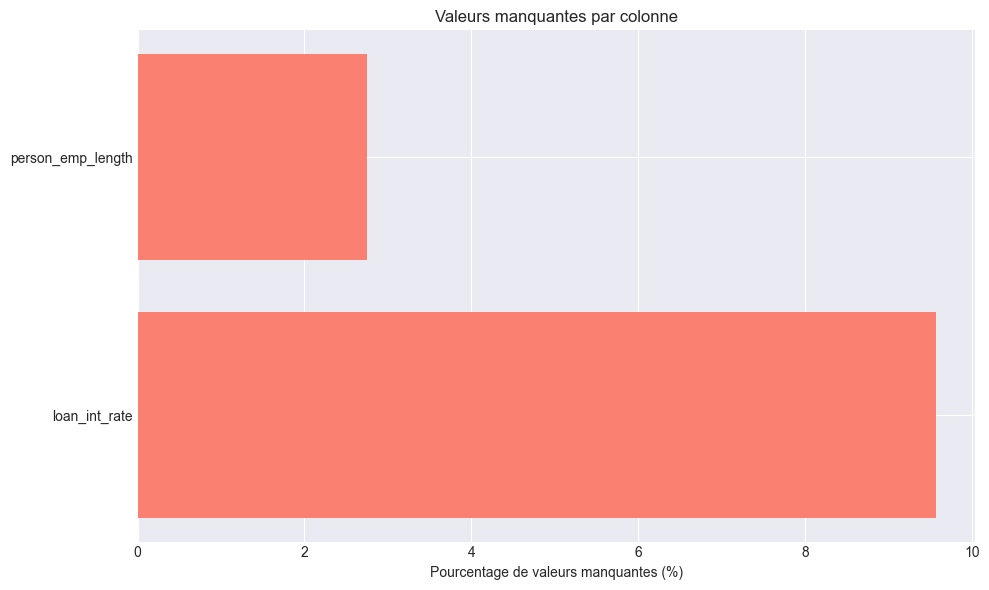


Total de valeurs manquantes: 4011


In [22]:
# Analyse des valeurs manquantes
print("🔍 ANALYSE DES VALEURS MANQUANTES")
print("="*80)

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Colonne': missing_values.index,
    'Valeurs Manquantes': missing_values.values,
    'Pourcentage (%)': missing_percentage.values
})

missing_df = missing_df[missing_df['Valeurs Manquantes'] > 0].sort_values('Valeurs Manquantes', ascending=False)

if len(missing_df) > 0:
    print(f"\n⚠️  {len(missing_df)} colonne(s) avec valeurs manquantes:\n")
    print(missing_df.to_string(index=False))
    
    # Visualisation
    plt.figure(figsize=(10, 6))
    plt.barh(missing_df['Colonne'], missing_df['Pourcentage (%)'], color='salmon')
    plt.xlabel('Pourcentage de valeurs manquantes (%)')
    plt.title('Valeurs manquantes par colonne')
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ Aucune valeur manquante détectée!")
    
print(f"\nTotal de valeurs manquantes: {df.isnull().sum().sum()}")

## 5. Traitement des valeurs manquantes

In [23]:
# Créer une copie du dataset
df_cleaned = df.copy()

print("🔧 TRAITEMENT DES VALEURS MANQUANTES")
print("="*80)

# Identifier les colonnes numériques et catégorielles
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Traiter les colonnes numériques avec valeurs manquantes
for col in numeric_cols:
    if df_cleaned[col].isnull().sum() > 0:
        median_value = df_cleaned[col].median()
        n_missing = df_cleaned[col].isnull().sum()
        df_cleaned[col].fillna(median_value, inplace=True)
        print(f"✓ {col}: {n_missing} valeurs remplacées par la médiane ({median_value:.2f})")



🔧 TRAITEMENT DES VALEURS MANQUANTES
✓ person_emp_length: 895 valeurs remplacées par la médiane (4.00)
✓ loan_int_rate: 3116 valeurs remplacées par la médiane (10.99)


## 6. Détection des valeurs aberrantes (Outliers)

In [24]:
# Détection des valeurs aberrantes
print("📈 DÉTECTION DES VALEURS ABERRANTES")
print("="*80)

outliers_summary = []

for col in numeric_cols:
    # Méthode IQR (Interquartile Range)
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_iqr = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    n_outliers_iqr = len(outliers_iqr)
    
    # Méthode Z-score
    z_scores = np.abs(stats.zscore(df_cleaned[col]))
    outliers_zscore = df_cleaned[z_scores > 3]
    n_outliers_zscore = len(outliers_zscore)
    
    outliers_summary.append({
        'Colonne': col,
        'Min': df_cleaned[col].min(),
        'Q1': Q1,
        'Médiane': df_cleaned[col].median(),
        'Q3': Q3,
        'Max': df_cleaned[col].max(),
        'Outliers (IQR)': n_outliers_iqr,
        'Outliers (Z-score)': n_outliers_zscore,
        'Borne Inf': lower_bound,
        'Borne Sup': upper_bound
    })

outliers_df = pd.DataFrame(outliers_summary)
print("\n📊 Résumé des valeurs aberrantes par colonne:\n")
print(outliers_df.to_string(index=False))

📈 DÉTECTION DES VALEURS ABERRANTES

📊 Résumé des valeurs aberrantes par colonne:

                   Colonne     Min       Q1  Médiane       Q3        Max  Outliers (IQR)  Outliers (Z-score)  Borne Inf  Borne Sup
                person_age   20.00    23.00    26.00    30.00     144.00            1494                 558      12.50      40.50
             person_income 4000.00 38500.00 55000.00 79200.00 6000000.00            1484                 233  -22550.00  140250.00
         person_emp_length    0.00     2.00     4.00     7.00     123.00             853                 321      -5.50      14.50
                 loan_amnt  500.00  5000.00  8000.00 12200.00   35000.00            1689                 337   -5800.00   23000.00
             loan_int_rate    5.42     8.49    10.99    13.11      23.22              70                  51       1.56      20.04
               loan_status    0.00     0.00     0.00     0.00       1.00            7108                   0       0.00       0.00
 

### Visualisation des outliers avec boxplots

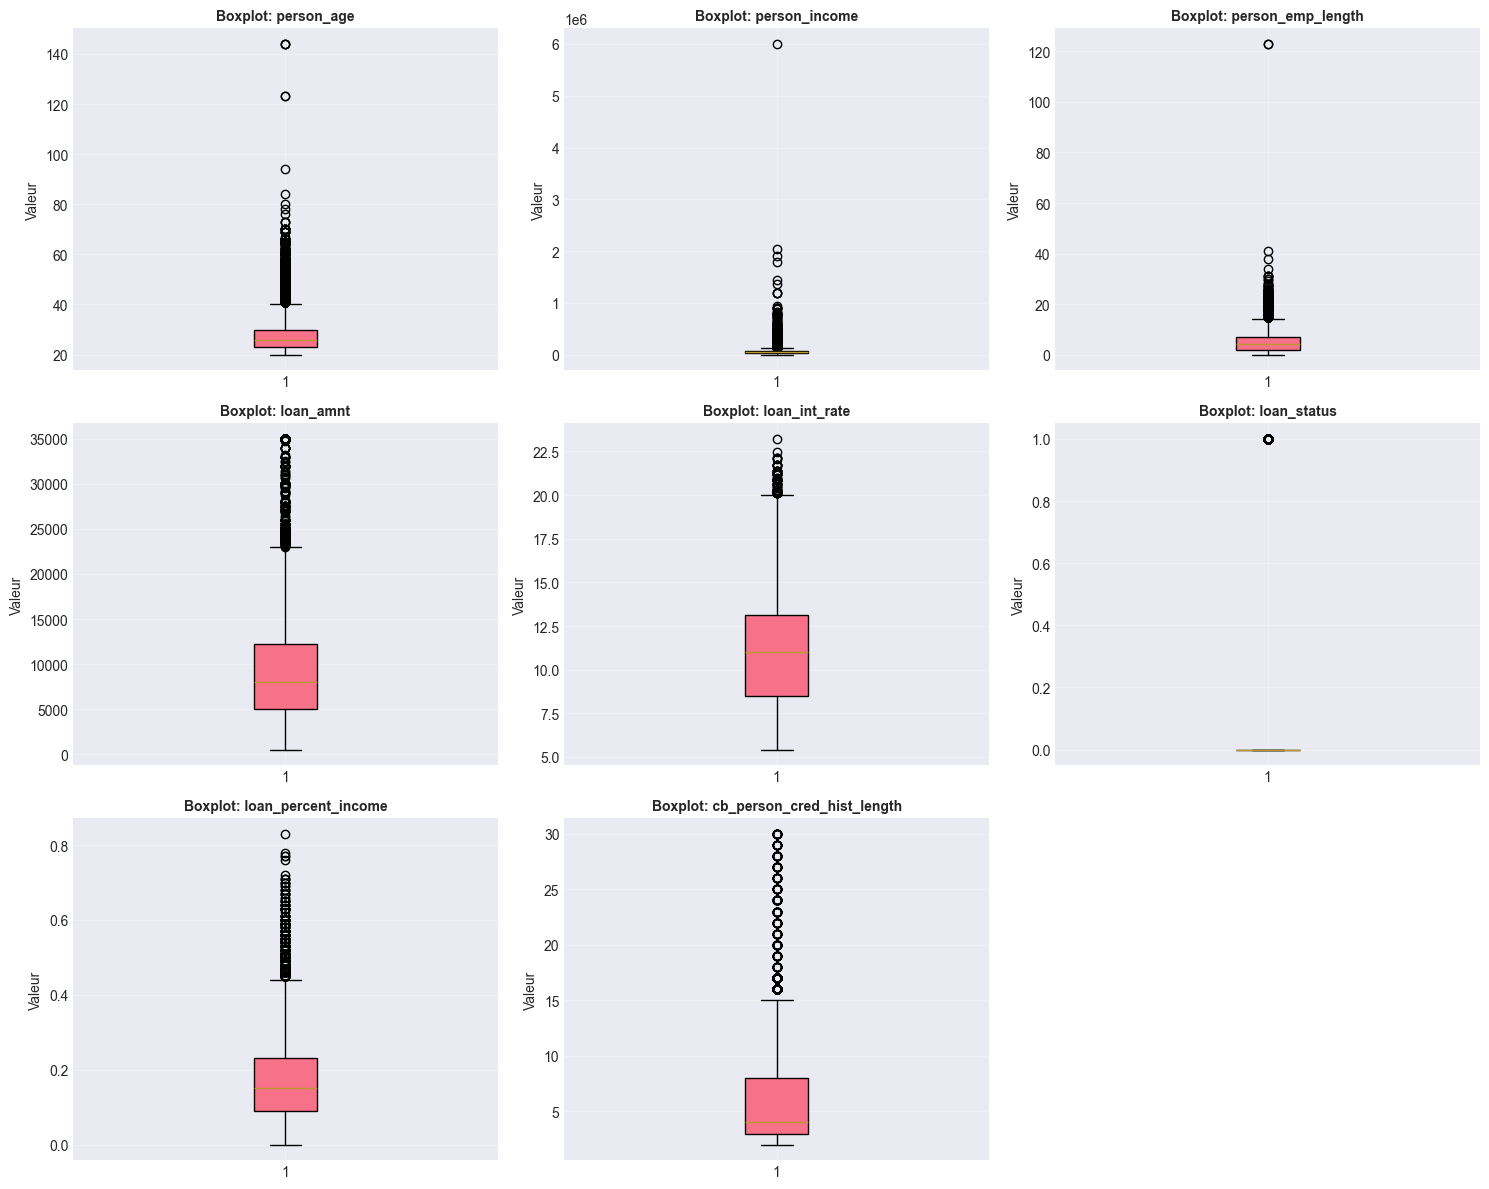

In [25]:
# Visualisation des outliers
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        axes[idx].boxplot(df_cleaned[col].dropna(), vert=True, patch_artist=True)
        axes[idx].set_title(f'Boxplot: {col}', fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Valeur')
        axes[idx].grid(True, alpha=0.3)

# Cacher les axes vides
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## 7. Filtrage des valeurs aberrantes extrêmes (seuils métier)

In [26]:
# Filtrage des valeurs aberrantes extrêmes basées sur la logique métier
print("🔧 FILTRAGE DES VALEURS ABERRANTES EXTRÊMES")
print("="*80)

df_filtered = df_cleaned.copy()
initial_rows = len(df_filtered)

# Dictionnaire des seuils métier pour chaque colonne
# Basé sur l'analyse métier et la cohérence des données
thresholds = {
    'person_income': 2e6,                    # Annual Income <= 2 millions (revenu annuel réaliste)
    'person_age': 90,                        # Age <= 90 ans (âge maximum raisonnable)
    'person_emp_length': 60,                 # Employment length <= 60 ans (durée d'emploi max)
    'loan_amnt': 5e6,                        # Loan amount <= 5 millions (montant de prêt maximum)
    'loan_int_rate': 35,                     # Interest rate <= 35% (taux d'intérêt maximum)
    'loan_percent_income': 1.0,              # Percent income <= 100% (ratio prêt/revenu max)
    'cb_person_cred_hist_length': 80         # Credit history length <= 80 ans (historique max)
}

# Appliquer les filtres
rows_removed_by_col = {}

for col, max_val in thresholds.items():
    if col in df_filtered.columns:
        n_before = len(df_filtered)
        df_filtered = df_filtered[df_filtered[col] <= max_val]
        n_removed = n_before - len(df_filtered)
        
        if n_removed > 0:
            rows_removed_by_col[col] = n_removed
            print(f"✓ {col}: {n_removed} lignes supprimées (seuil: <= {max_val:,.0f})")

total_removed = initial_rows - len(df_filtered)
print(f"\n📊 Résumé du filtrage:")
print(f"   Lignes initiales: {initial_rows:,}")
print(f"   Lignes finales: {len(df_filtered):,}")
print(f"   Total supprimé: {total_removed:,} ({(total_removed/initial_rows)*100:.2f}%)")

# Mettre à jour df_cleaned avec le dataset filtré
df_cleaned = df_filtered.copy()
print(f"\n✅ Dataset mis à jour après filtrage des valeurs aberrantes extrêmes")

🔧 FILTRAGE DES VALEURS ABERRANTES EXTRÊMES
✓ person_income: 2 lignes supprimées (seuil: <= 2,000,000)
✓ person_age: 5 lignes supprimées (seuil: <= 90)
✓ person_emp_length: 2 lignes supprimées (seuil: <= 60)

📊 Résumé du filtrage:
   Lignes initiales: 32,581
   Lignes finales: 32,572
   Total supprimé: 9 (0.03%)

✅ Dataset mis à jour après filtrage des valeurs aberrantes extrêmes


## 9. Analyse des colonnes catégorielles

In [27]:
# Analyse des colonnes catégorielles
print("📊 ANALYSE DES COLONNES CATÉGORIELLES")
print("="*80)

for col in categorical_cols:
    unique_values = df_cleaned[col].unique()
    value_counts = df_cleaned[col].value_counts()
    
    print(f"\n🔹 {col}:")
    print(f"   Nombre de valeurs uniques: {len(unique_values)}")
    print(f"   Valeurs: {list(unique_values)}")
    print(f"\n   Distribution:")
    for val, count in value_counts.items():
        print(f"      {val}: {count:,} ({(count/len(df_cleaned))*100:.2f}%)")

📊 ANALYSE DES COLONNES CATÉGORIELLES

🔹 person_home_ownership:
   Nombre de valeurs uniques: 4
   Valeurs: ['OWN', 'MORTGAGE', 'RENT', 'OTHER']

   Distribution:
      RENT: 16,440 (50.47%)
      MORTGAGE: 13,441 (41.27%)
      OWN: 2,584 (7.93%)
      OTHER: 107 (0.33%)

🔹 loan_intent:
   Nombre de valeurs uniques: 6
   Valeurs: ['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION']

   Distribution:
      EDUCATION: 6,451 (19.81%)
      MEDICAL: 6,070 (18.64%)
      VENTURE: 5,715 (17.55%)
      PERSONAL: 5,519 (16.94%)
      DEBTCONSOLIDATION: 5,212 (16.00%)
      HOMEIMPROVEMENT: 3,605 (11.07%)

🔹 loan_grade:
   Nombre de valeurs uniques: 7
   Valeurs: ['B', 'C', 'A', 'D', 'E', 'F', 'G']

   Distribution:
      A: 10,776 (33.08%)
      B: 10,448 (32.08%)
      C: 6,454 (19.81%)
      D: 3,625 (11.13%)
      E: 964 (2.96%)
      F: 241 (0.74%)
      G: 64 (0.20%)

🔹 cb_person_default_on_file:
   Nombre de valeurs uniques: 2
   Valeurs: ['N', 'Y']

  

### Visualisation des variables catégorielles

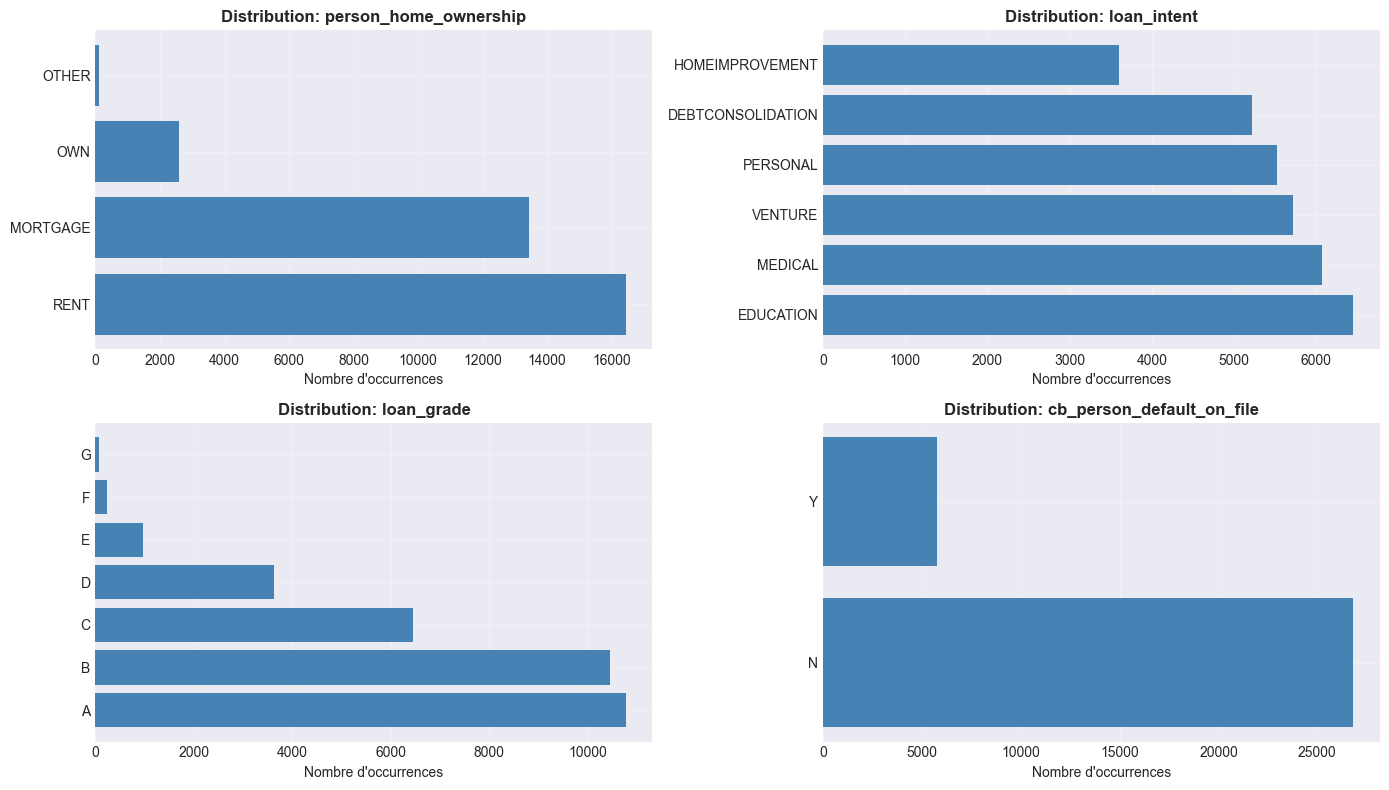

In [28]:
# Visualisation des variables catégorielles
n_cat_cols = len(categorical_cols)
if n_cat_cols > 0:
    n_rows_cat = (n_cat_cols + 1) // 2
    fig, axes = plt.subplots(n_rows_cat, 2, figsize=(14, n_rows_cat * 4))
    axes = axes.flatten() if n_cat_cols > 1 else [axes]
    
    for idx, col in enumerate(categorical_cols):
        if idx < len(axes):
            value_counts = df_cleaned[col].value_counts()
            axes[idx].barh(value_counts.index, value_counts.values, color='steelblue')
            axes[idx].set_xlabel('Nombre d\'occurrences')
            axes[idx].set_title(f'Distribution: {col}', fontweight='bold')
            axes[idx].grid(True, alpha=0.3)
    
    # Cacher les axes vides
    for idx in range(n_cat_cols, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

## 10. Encodage des variables catégorielles (Label Encoding)

In [29]:
from sklearn.preprocessing import LabelEncoder

# Encodage des variables catégorielles
print("🔢 ENCODAGE DES VARIABLES CATÉGORIELLES (Label Encoding)")
print("="*80)

# Sauvegarder les valeurs originales pour la comparaison
original_values = {}
for col in categorical_cols:
    original_values[col] = df_cleaned[col].copy()

# Dictionnaire pour stocker les encoders (pour référence future)
label_encoders = {}

# Appliquer le Label Encoding directement sur df_cleaned
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))
    label_encoders[col] = le
    
    # Afficher le mapping
    print(f"\n✓ {col}:")
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    for original, encoded in mapping.items():
        count = (original_values[col] == original).sum()
        print(f"   {original} → {encoded} ({count:,} occurrences)")

print(f"\n✅ {len(categorical_cols)} variables catégorielles encodées avec succès!")
print(f"\n📊 Aperçu du dataset:")
df_cleaned.head()

🔢 ENCODAGE DES VARIABLES CATÉGORIELLES (Label Encoding)

✓ person_home_ownership:
   MORTGAGE → 0 (13,441 occurrences)
   OTHER → 1 (107 occurrences)
   OWN → 2 (2,584 occurrences)
   RENT → 3 (16,440 occurrences)

✓ loan_intent:
   DEBTCONSOLIDATION → 0 (5,212 occurrences)
   EDUCATION → 1 (6,451 occurrences)
   HOMEIMPROVEMENT → 2 (3,605 occurrences)
   MEDICAL → 3 (6,070 occurrences)
   PERSONAL → 4 (5,519 occurrences)
   VENTURE → 5 (5,715 occurrences)

✓ loan_grade:
   A → 0 (10,776 occurrences)
   B → 1 (10,448 occurrences)
   C → 2 (6,454 occurrences)
   D → 3 (3,625 occurrences)
   E → 4 (964 occurrences)
   F → 5 (241 occurrences)
   G → 6 (64 occurrences)

✓ cb_person_default_on_file:
   N → 0 (26,829 occurrences)
   Y → 1 (5,743 occurrences)

✅ 4 variables catégorielles encodées avec succès!

📊 Aperçu du dataset:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
5,21,9900,2,2.0,5,0,2500,7.14,1,0.25,0,2


In [30]:
# Comparaison visuelle avant/après encodage
print("📊 COMPARAISON AVANT/APRÈS ENCODAGE")
print("="*80)

# Créer un DataFrame comparatif pour les premières lignes
comparison_df = pd.DataFrame({
    'Colonne': [],
    'Avant (Original)': [],
    'Après (Encodé)': []
})

for col in categorical_cols:
    # Prendre quelques exemples
    sample_indices = original_values[col].dropna().head(3).index
    for idx in sample_indices:
        comparison_df = pd.concat([comparison_df, pd.DataFrame({
            'Colonne': [col],
            'Avant (Original)': [original_values[col].loc[idx]],
            'Après (Encodé)': [df_cleaned.loc[idx, col]]
        })], ignore_index=True)

print("\n" + comparison_df.to_string(index=False))

print(f"\n✅ Toutes les colonnes catégorielles sont maintenant numériques!")
print(f"\n📋 Types de données du dataset:")
print(df_cleaned.dtypes)

📊 COMPARAISON AVANT/APRÈS ENCODAGE

                  Colonne Avant (Original)  Après (Encodé)
    person_home_ownership              OWN             2.0
    person_home_ownership         MORTGAGE             0.0
    person_home_ownership             RENT             3.0
              loan_intent        EDUCATION             1.0
              loan_intent          MEDICAL             3.0
              loan_intent          MEDICAL             3.0
               loan_grade                B             1.0
               loan_grade                C             2.0
               loan_grade                C             2.0
cb_person_default_on_file                N             0.0
cb_person_default_on_file                N             0.0
cb_person_default_on_file                N             0.0

✅ Toutes les colonnes catégorielles sont maintenant numériques!

📋 Types de données du dataset:
person_age                      int64
person_income                   int64
person_home_ownership   

## 11. Sauvegarde du dataset final

In [ ]:
# Sauvegarde des datasets
print("💾 SAUVEGARDE DU DATASET NETTOYÉ")
print("="*80)

# Dataset final (prêt pour le machine learning)
df_cleaned.to_csv('credit_risk_dataset_post_preprocess.csv', index=False)
print("✅ credit_risk_dataset_post_preprocess.csv - Dataset complet (nettoyé et encodé)")

print("\n🎉 Dataset sauvegardé avec succès!")
print(f"\n📊 Dimensions finales: {df_cleaned.shape[0]:,} lignes × {df_cleaned.shape[1]} colonnes")

💾 SAUVEGARDE DU DATASET NETTOYÉ
✅ credit_risk_dataset_final.csv - Dataset complet (nettoyé et encodé)

🎉 Dataset sauvegardé avec succès!

📊 Dimensions finales: 32,572 lignes × 12 colonnes


## 12. Rapport final

### 📋 Résumé du preprocessing effectué:

**Étapes réalisées:**
1. ✅ Chargement et exploration du dataset
2. ✅ Analyse des valeurs manquantes
3. ✅ Traitement des valeurs manquantes (médiane pour variables numériques)
4. ✅ Détection des valeurs aberrantes (méthodes IQR et Z-score)
5. ✅ Filtrage des valeurs aberrantes extrêmes (seuils métier)
6. ✅ Vérification des doublons
7. ✅ Analyse des variables catégorielles
8. ✅ Encodage des variables catégorielles (Label Encoding)
9. ✅ Sauvegarde du dataset final

**Fichier généré:**
- `credit_risk_dataset_final.csv` - Dataset complet (nettoyé et encodé, prêt pour le machine learning)

**Transformations appliquées sur df_cleaned:**
- Valeurs manquantes remplacées par la médiane
- Valeurs aberrantes extrêmes filtrées selon seuils métier
- Variables catégorielles encodées avec LabelEncoder

**Seuils appliqués pour le filtrage des outliers:**
- Age <= 90 ans
- Revenu annuel <= 2 000 000
- Ancienneté emploi <= 60 ans
- Montant prêt <= 5 000 000
- Taux d'intérêt <= 35%
- Ratio prêt/revenu <= 100%
- Historique crédit <= 80 ans

**Recommandations:**
- Le dataset `df_cleaned` contient toutes les transformations et est prêt pour la modélisation
- Toutes les variables sont maintenant numériques
- Le fichier sauvegardé peut être directement utilisé pour le machine learning

### Discrétisation : 